# AEGIS: Life Cycle Assessment of electricity and heat production with Advanced Geothermal Systems (AGS)

This notebook is for doing the LCA of AGS plants and electricity/heat production.



### Import necessary packages

In [1]:
import bw2io as bi
import bw2data as bd
import bw2calc as bc

from premise import *  # in the environment, do pip install premise
from datapackage import Package

import pandas as pd
#import seaborn as sns
import matplotlib as plt
import polyviz as pv #in the environment, do pip install polyviz

import numpy as np


### Preparing the project - importing biosphere, lcia methods, ecoinvent and creating future ecoinvent databases

In [2]:
bd.projects.set_current("ags_publication_2025")

In [ ]:
#import biosphere, ecoinvent, LCIA methods
#bi.import_ecoinvent_release('3.10.1', 'cutoff', 'Username', 'PW')

In [3]:
list(bd.databases)

['ecoinvent-3.10.1-biosphere',
 'ecoinvent-3.10.1-cutoff',
 'co2_kva',
 'ags',
 'ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1141 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1147 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1149 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1150 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1152 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1156 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1160 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-Base_2050_BAU_AGS 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1141 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1147 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1149 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1150 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1152 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1156 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-PkB

# Create future databases with premise for the year 2030 and the year 2050


 - use the image IAM. 

This is done with the "premise_notebook.ipynb", using the Swiss specific data from STEM with and without AGS

https://github.com/premise-community-scenarios/sweet_sure-2050-switzerland

https://github.com/KarinTreyer/stem_to_premise_advanced_geothermal

#### Premise with Swiss electricity mixes according to EEG modellings including AGS

1. Take the STEM output file from G:\04_Projects_Proposals\01_Current Projects\2022 - AEGIS-CH\SP4 - STEM. 
2. Make a copy 

In [ ]:
#Create the datapackage.json file from the STEM input
#In order to create the necessary STEM input file, you need to open the STEM.xlsx file, save it under a new name, and update the link to the STEAM output file you wish.
# Then, you use that file as input to 

In [ ]:
sps = Package(r"C:\Users\treyer_k\Documents\GitHub\stem_to_premise_advanced_geothermal\datapackage.json")
scenarios = [
    #{"model": "remind", "pathway": "SSP2-Base", "year": 2020, "external scenarios": [{"scenario": "SPS1", "data": sps}]},
    {"model": "remind", "pathway": "SSP2-Base", "year": 2050, "external scenarios": [{"scenario": "AGS_1141", "data": sps}]},
    {"model": "remind", "pathway": "SSP2-Base", "year": 2050, "external scenarios": [{"scenario": "AGS_1147", "data": sps}]},
    {"model": "remind", "pathway": "SSP2-Base", "year": 2050, "external scenarios": [{"scenario": "AGS_1149", "data": sps}]},
    {"model": "remind", "pathway": "SSP2-Base", "year": 2050, "external scenarios": [{"scenario": "AGS_1150", "data": sps}]},
    {"model": "remind", "pathway": "SSP2-Base", "year": 2050, "external scenarios": [{"scenario": "AGS_1152", "data": sps}]},
    {"model": "remind", "pathway": "SSP2-Base", "year": 2050, "external scenarios": [{"scenario": "AGS_1156", "data": sps}]},
    {"model": "remind", "pathway": "SSP2-Base", "year": 2050, "external scenarios": [{"scenario": "AGS_1160", "data": sps}]},
    {"model": "remind", "pathway": "SSP2-Base", "year": 2050, "external scenarios": [{"scenario": "BAU_AGS", "data": sps}]},
    
    {"model": "remind", "pathway": "SSP2-PkBudg1150", "year": 2050, "external scenarios": [{"scenario": "AGS_1141", "data": sps}]},
    {"model": "remind", "pathway": "SSP2-PkBudg1150", "year": 2050, "external scenarios": [{"scenario": "AGS_1147", "data": sps}]},
    {"model": "remind", "pathway": "SSP2-PkBudg1150", "year": 2050, "external scenarios": [{"scenario": "AGS_1149", "data": sps}]},
    {"model": "remind", "pathway": "SSP2-PkBudg1150", "year": 2050, "external scenarios": [{"scenario": "AGS_1150", "data": sps}]},
    {"model": "remind", "pathway": "SSP2-PkBudg1150", "year": 2050, "external scenarios": [{"scenario": "AGS_1152", "data": sps}]},
    {"model": "remind", "pathway": "SSP2-PkBudg1150", "year": 2050, "external scenarios": [{"scenario": "AGS_1156", "data": sps}]},
    {"model": "remind", "pathway": "SSP2-PkBudg1150", "year": 2050, "external scenarios": [{"scenario": "AGS_1160", "data": sps}]},
    {"model": "remind", "pathway": "SSP2-PkBudg1150", "year": 2050, "external scenarios": [{"scenario": "BAU_AGS", "data": sps}]},


]

ndb = NewDatabase(
        scenarios=scenarios,
        source_db="ecoinvent-3.10.1-cutoff", # <-- name of the database in the BW2 project. Must be a string.
        source_version="3.10", # <-- version of ecoinvent. Can be "3.5", "3.6", "3.7" or "3.8". Must be a string.
        key="tUePmX_S5B8ieZkkM7WUU2CnO8SmShwmAeWK9x2rTFo=",
        use_absolute_efficiency=True,
        biosphere_name="ecoinvent-3.10.1-biosphere"
        
)

ndb.update()
ndb.write_db_to_brightway()

#180 minutes for 16 databases
#225 minutes for 16 databases
#174 minutes for 15 databases

#### Backup the project

In [ ]:
#backup the project with all background databases
bi.backup.backup_project_directory(
    project='ags_publication'
   )

In [6]:
bi.backup.restore_project_directory(
    fp=r'C:\Users\treyer_k\Documents\PSI\AEGIS-CH\Publication\SP1_SP2_SP4\LCI\brightway2-project-ags_publication-backup.13-May-2025-03-05PM.tar.gz',
    project_name='ags_publication_2025'
)

Restoring project backup archive - this could take a few minutes...


'ags_publication_2025'

# Prepare for LCIA and contribution calculations

In [9]:
#searching lcia methods
lcia = bd.methods


ef = [m for m in lcia if 'EF v3.1' in str(m)
      and 'no LT' not in str(m)
      and 'biogenic' not in str(m)
      and 'fossil' not in str(m)
      and 'inorganics' not in str(m)
      and 'organics' not in str(m)
      and 'carcinogenic' not in str(m)
      and 'non-carcinogenic' not in str(m)
      and 'EN15804' not in str(m)]
ef

#len(ef)

[('EF v3.1', 'acidification', 'accumulated exceedance (AE)'),
 ('EF v3.1', 'climate change', 'global warming potential (GWP100)'),
 ('EF v3.1',
  'climate change: land use and land use change',
  'global warming potential (GWP100)'),
 ('EF v3.1',
  'ecotoxicity: freshwater',
  'comparative toxic unit for ecosystems (CTUe)'),
 ('EF v3.1',
  'eutrophication: freshwater',
  'fraction of nutrients reaching freshwater end compartment (P)'),
 ('EF v3.1',
  'eutrophication: marine',
  'fraction of nutrients reaching marine end compartment (N)'),
 ('EF v3.1', 'eutrophication: terrestrial', 'accumulated exceedance (AE)'),
 ('EF v3.1',
  'ionising radiation: human health',
  'human exposure efficiency relative to u235'),
 ('EF v3.1', 'land use', 'soil quality index'),
 ('EF v3.1',
  'material resources: metals/minerals',
  'abiotic depletion potential (ADP): elements (ultimate reserves)'),
 ('EF v3.1', 'ozone depletion', 'ozone depletion potential (ODP)'),
 ('EF v3.1', 'particulate matter format

In [10]:
ipcc = [m for m in bd.methods if 'IPCC' in str(m) 
        and '2021' in str(m) 
        and 'GWP' in str(m) 
        and 'LT' not in str(m) 
        and 'fossil' not in str(m) 
        and 'biogenic' not in str(m) 
        and 'land use' not in str(m)
        and 'SLCFs' not in str(m)
        and 'GWP20' not in str(m)
        and 'GWP500' not in str(m)]
ipcc

[('IPCC 2021', 'climate change', 'global warming potential (GWP100)')]

In [11]:
MY_METHODS = [
    ('IPCC 2021', 'climate change', 'global warming potential (GWP100)'),
    ('EF v3.1', 'acidification', 'accumulated exceedance (AE)'),
    ('EF v3.1', 'ecotoxicity: freshwater', 'comparative toxic unit for ecosystems (CTUe)'),
    ('EF v3.1', 'ecotoxicity: freshwater, inorganics', 'comparative toxic unit for ecosystems (CTUe)'),
    ('EF v3.1', 'ecotoxicity: freshwater, organics', 'comparative toxic unit for ecosystems (CTUe)'),
    ('EF v3.1', 'energy resources: non-renewable', 'abiotic depletion potential (ADP): fossil fuels'),
    ('EF v3.1', 'eutrophication: freshwater', 'fraction of nutrients reaching freshwater end compartment (P)'),
    ('EF v3.1', 'eutrophication: marine', 'fraction of nutrients reaching marine end compartment (N)'),
    ('EF v3.1', 'eutrophication: terrestrial', 'accumulated exceedance (AE)'),
    ('EF v3.1', 'human toxicity: carcinogenic', 'comparative toxic unit for human (CTUh)'),
    ('EF v3.1', 'human toxicity: carcinogenic, inorganics', 'comparative toxic unit for human (CTUh)'),
    ('EF v3.1', 'human toxicity: carcinogenic, organics', 'comparative toxic unit for human (CTUh)'),
    ('EF v3.1', 'human toxicity: non-carcinogenic', 'comparative toxic unit for human (CTUh)'),
    ('EF v3.1', 'human toxicity: non-carcinogenic, inorganics', 'comparative toxic unit for human (CTUh)'),
    ('EF v3.1', 'human toxicity: non-carcinogenic, organics', 'comparative toxic unit for human (CTUh)'),
    ('EF v3.1', 'ionising radiation: human health', 'human exposure efficiency relative to u235'),
    ('EF v3.1', 'land use', 'soil quality index'),
    ('EF v3.1', 'material resources: metals/minerals', 'abiotic depletion potential (ADP): elements (ultimate reserves)'),
    ('EF v3.1', 'ozone depletion', 'ozone depletion potential (ODP)'),
    ('EF v3.1', 'particulate matter formation', 'impact on human health'),
    ('EF v3.1', 'photochemical oxidant formation: human health', 'tropospheric ozone concentration increase'),
]

In [12]:
MY_METHODS_SHORT = [
    ('IPCC 2021', 'climate change', 'global warming potential (GWP100)'),
    ('EF v3.1', 'acidification', 'accumulated exceedance (AE)'),
    ('EF v3.1', 'ecotoxicity: freshwater', 'comparative toxic unit for ecosystems (CTUe)'),
    #('EF v3.1', 'human toxicity: carcinogenic', 'comparative toxic unit for human (CTUh)'),
    #('EF v3.1', 'human toxicity: non-carcinogenic', 'comparative toxic unit for human (CTUh)'),
    #('EF v3.1', 'land use', 'soil quality index'),
    ('EF v3.1', 'material resources: metals/minerals', 'abiotic depletion potential (ADP): elements (ultimate reserves)'),
    ('EF v3.1', 'ozone depletion', 'ozone depletion potential (ODP)'),
    ('EF v3.1', 'particulate matter formation', 'impact on human health'),
    ('EF v3.1', 'photochemical oxidant formation: human health', 'tropospheric ozone concentration increase'),
]

In [13]:
DICT_UNITS = {
    ('IPCC 2021', 'climate change', 'global warming potential (GWP100)'): "kg CO$_{2}$-eq.",  
     ('EF v3.1', 'acidification', 'accumulated exceedance (AE)'): "mol H+ -eq.", 
    ('EF v3.1', 'ecotoxicity: freshwater', 'comparative toxic unit for ecosystems (CTUe)'): "CTUe",  
    ('EF v3.1', 'ecotoxicity: freshwater, inorganics', 'comparative toxic unit for ecosystems (CTUe)'): "CTUe",  
    ('EF v3.1', 'ecotoxicity: freshwater, organics', 'comparative toxic unit for ecosystems (CTUe)'): "CTUe",  
    ('EF v3.1', 'energy resources: non-renewable', 'abiotic depletion potential (ADP): fossil fuels'): "MJ, net calorific value",  
    ('EF v3.1', 'eutrophication: freshwater', 'fraction of nutrients reaching freshwater end compartment (P)'): "kg P-eq.",
    ('EF v3.1', 'eutrophication: marine', 'fraction of nutrients reaching marine end compartment (N)'): "kg N-eq.",  
    ('EF v3.1', 'eutrophication: terrestrial', 'accumulated exceedance (AE)'): "mol N-eq." ,
    ('EF v3.1', 'human toxicity: carcinogenic', 'comparative toxic unit for human (CTUh)'): "CTUh",  
    ('EF v3.1', 'human toxicity: carcinogenic, inorganics', 'comparative toxic unit for human (CTUh)'): "CTUh",  
    ('EF v3.1', 'human toxicity: carcinogenic, organics', 'comparative toxic unit for human (CTUh)'): "CTUh",  
    ('EF v3.1', 'human toxicity: non-carcinogenic', 'comparative toxic unit for human (CTUh)'): "CTUh",  
    ('EF v3.1', 'human toxicity: non-carcinogenic, inorganics', 'comparative toxic unit for human (CTUh)'): "CTUh",  
    ('EF v3.1', 'human toxicity: non-carcinogenic, organics', 'comparative toxic unit for human (CTUh)'): "CTUh",  
    ('EF v3.1', 'ionising radiation: human health', 'human exposure efficiency relative to u235'): "kBq U$_{235}$-eq.",  
    ('EF v3.1', 'material resources: metals/minerals', 'abiotic depletion potential (ADP): elements (ultimate reserves)'): "kg Sb-eq.",  
    ('EF v3.1', 'ozone depletion', 'ozone depletion potential (ODP)'): "kg CFC-11-eq.",  
    ('EF v3.1', 'land use', 'soil quality index'): "dimensionless",      
    ('EF v3.1', 'particulate matter formation', 'impact on human health'): "disease incidence",  
    ('EF v3.1', 'photochemical oxidant formation: human health', 'tropospheric ozone concentration increase'): "kg NMVOC-eq.",  
    ('EF v3.1', 'water use', 'user deprivation potential (deprivation-weighted water consumption)'): "m$^{3}$ world eq. deprived",  
             }

# Calculate environmental impacts of Swiss electricity according to STEM scenarios with/without geothermal

In [14]:
bd.databases

Databases dictionary with 20 object(s):
	ags
	co2_kva
	ecoinvent-3.10.1-biosphere
	ecoinvent-3.10.1-cutoff
	ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1141 2025-05-13
	ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1147 2025-05-13
	ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1149 2025-05-13
	ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1150 2025-05-13
	ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1152 2025-05-13
	ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1156 2025-05-13
	ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1160 2025-05-13
	ei_cutoff_3.10_remind_SSP2-Base_2050_BAU_AGS 2025-05-13
	ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1141 2025-05-13
	ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1147 2025-05-13
	ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1149 2025-05-13
	ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1150 2025-05-13
	ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1152 2025-05-13
	ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1156 2025-05-13
	ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AG

In [15]:
future_dbs = [x for x in bd.databases if 'remind' in x]
future_dbs

['ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1141 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1147 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1149 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1150 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1152 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1156 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1160 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-Base_2050_BAU_AGS 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1141 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1147 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1149 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1150 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1152 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1156 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1160 2025-05-13',
 'ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050

In [16]:
#Take the low voltage markets for the environmental impact score of the consumed electricity
el_ds_low = [x for db in future_dbs 
         for x in bd.Database(db)
         if 'market for electricity, low voltage (SPS)' in x['name']]

el_ds_low

['market for electricity, low voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, low voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, low voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, low voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, low voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, low voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, low voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, low voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, low voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, low voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, low voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, low voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, low voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, low voltage (SPS)' (kilowatt hour, CH,

In [17]:
#Take the high voltage markets to do the contribution analysis (premise does not have suppliers on medium/low voltage markets)

el_ds_high = [x for db in future_dbs 
         for x in bd.Database(db)
         if 'market for electricity, high voltage (SPS)' in x['name']]

el_ds_high

['market for electricity, high voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, high voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, high voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, high voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, high voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, high voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, high voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, high voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, high voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, high voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, high voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, high voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, high voltage (SPS)' (kilowatt hour, CH, None),
 'market for electricity, high voltage (SPS)' (kilo

In [18]:
#check from which database these activities are:
for el in el_ds_low:
    print(el['database'])

ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1141 2025-05-13
ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1147 2025-05-13
ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1149 2025-05-13
ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1150 2025-05-13
ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1152 2025-05-13
ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1156 2025-05-13
ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1160 2025-05-13
ei_cutoff_3.10_remind_SSP2-Base_2050_BAU_AGS 2025-05-13
ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1141 2025-05-13
ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1147 2025-05-13
ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1149 2025-05-13
ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1150 2025-05-13
ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1152 2025-05-13
ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1156 2025-05-13
ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1160 2025-05-13
ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_BAU_AGS 2025-05-13


In [19]:
#TODO: Display activity name and database together

el_ds_dict = {}

for db in future_dbs:
    el = [x for x in bd.Database(db) if 'market for electricity, low voltage (SPS)' in x['name']]
    el_ds_low[db] = el  # Store the list of activities under the database name

el_ds_dict


TypeError: list indices must be integers or slices, not str

In [ ]:
#TODO
#Create a dictionary which translates the future_dbs names into a more human readable name.
#The keys are the elements of "future_dbs", the values are the elements of "scenario_names"

scenario_names = [
    'Base 2030 AGS',
 'Base 2050 AGS',
 'RCP26 2030 AGS',
 'RCP26 2050 AGS',
 'Base 2030 no geothermal',
 'Base 2050 no geothermal',
 'RCP26 2030 no geothermal',
 'RCP26 2050 no geothermal',
 ]

#now combine the two lists into a dictionary

scenarios = dict(zip(future_dbs, scenario_names))

scenarios

In [20]:
#for each of the element in el_ds_dict, do the lca

FU = [{x:1} for x in el_ds_low]

bd.calculation_setups['Swiss electricity'] = {'inv':FU, 'ia': MY_METHODS_SHORT}
mLCA = bc.MultiLCA('Swiss electricity')
mLCA.results

array([[3.37761480e-02, 5.42501403e-04, 7.81547388e-01, 5.89616308e-06,
        2.63625679e-09, 6.06914912e-09, 2.46254425e-04],
       [3.33871508e-02, 5.40189716e-04, 7.83058074e-01, 5.86349080e-06,
        2.60704821e-09, 6.02646365e-09, 2.44194596e-04],
       [3.26195206e-02, 5.34353847e-04, 7.79580096e-01, 5.77419355e-06,
        2.39125829e-09, 5.97393993e-09, 2.40907439e-04],
       [3.22748347e-02, 5.31384577e-04, 7.79457020e-01, 5.74022710e-06,
        2.35308438e-09, 5.93714501e-09, 2.39330300e-04],
       [3.15791529e-02, 5.23378301e-04, 7.79714832e-01, 5.66106503e-06,
        2.29317227e-09, 5.80768176e-09, 2.34082136e-04],
       [3.04361668e-02, 5.10406749e-04, 7.69555123e-01, 5.48130692e-06,
        2.14929492e-09, 5.71754439e-09, 2.28325311e-04],
       [2.97027508e-02, 5.01345758e-04, 7.61235478e-01, 5.32811848e-06,
        2.02488045e-09, 5.64559665e-09, 2.24193652e-04],
       [1.55701880e-01, 4.58826063e-04, 5.93351300e-01, 4.20253650e-06,
        9.33680274e-09, 2

In [21]:
mLCAdf = pd.DataFrame(index = MY_METHODS_SHORT, 
                      columns = [(x['name'], x['location'], x['database'])
                                 for y in FU for x in y], data = mLCA.results.T)

mLCAdf

,"(market for electricity, low voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1141 2025-05-13)","(market for electricity, low voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1147 2025-05-13)","(market for electricity, low voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1149 2025-05-13)","(market for electricity, low voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1150 2025-05-13)","(market for electricity, low voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1152 2025-05-13)","(market for electricity, low voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1156 2025-05-13)","(market for electricity, low voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1160 2025-05-13)","(market for electricity, low voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-Base_2050_BAU_AGS 2025-05-13)","(market for electricity, low voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1141 2025-05-13)","(market for electricity, low voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1147 2025-05-13)","(market for electricity, low voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1149 2025-05-13)","(market for electricity, low voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1150 2025-05-13)","(market for electricity, low voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1152 2025-05-13)","(market for electricity, low voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1156 2025-05-13)","(market for electricity, low voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1160 2025-05-13)","(market for electricity, low voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_BAU_AGS 2025-05-13)"
"(IPCC 2021, climate change, global warming potential (GWP100))",3.377615e-02,3.338715e-02,3.261952e-02,3.227483e-02,3.157915e-02,3.043617e-02,2.970275e-02,1.557019e-01,2.602408e-02,2.572404e-02,2.516354e-02,2.490536e-02,2.443506e-02,2.368449e-02,2.319711e-02,1.470658e-01
"(EF v3.1, acidification, accumulated exceedance (AE))",5.425014e-04,5.401897e-04,5.343538e-04,5.313846e-04,5.233783e-04,5.104067e-04,5.013458e-04,4.588261e-04,5.328458e-04,5.308238e-04,5.251578e-04,5.222881e-04,5.145651e-04,5.018637e-04,4.932097e-04,4.593682e-04
"(EF v3.1, ecotoxicity: freshwater, comparative toxic unit for ecosystems (CTUe))",7.815474e-01,7.830581e-01,7.795801e-01,7.794570e-01,7.797148e-01,7.695551e-01,7.612355e-01,5.933513e-01,7.809320e-01,7.825654e-01,7.789838e-01,7.788124e-01,7.789997e-01,7.686587e-01,7.604982e-01,6.063616e-01
"(EF v3.1, material resources: metals/minerals, abiotic depletion potential (ADP): elements (ultimate reserves))",5.896163e-06,5.863491e-06,5.774194e-06,5.740227e-06,5.661065e-06,5.481307e-06,5.328118e-06,4.202536e-06,5.945093e-06,5.912792e-06,5.821362e-06,5.786880e-06,5.706393e-06,5.522542e-06,5.367812e-06,4.315138e-06
"(EF v3.1, ozone depletion, ozone depletion potential (ODP))",2.636257e-09,2.607048e-09,2.391258e-09,2.353084e-09,2.293172e-09,2.149295e-09,2.024880e-09,9.336803e-09,2.650257e-09,2.619213e-09,2.407787e-09,2.370018e-09,2.310420e-09,2.175039e-09,2.052571e-09,9.131907e-09
"(EF v3.1, particulate matter formation, impact on human health)",6.069149e-09,6.026464e-09,5.973940e-09,5.937145e-09,5.807682e-09,5.717544e-09,5.645597e-09,2.329846e-09,6.020575e-09,5.980632e-09,5.931131e-09,5.895425e-09,5.768337e-09,5.683092e-09,5.616854e-09,2.369132e-09
"(EF v3.1, photochemical oxidant formation: human health, tropospheric ozone concentration increase)",2.462544e-04,2.441946e-04,2.409074e-04,2.393303e-04,2.340821e-04,2.283253e-04,2.241937e-04,2.730165e-04,2.408644e-04,2.389693e-04,2.358026e-04,2.342935e-04,2.292120e-04,2.236681e-04,2.197901e-04,2.717198e-04


In [22]:
#write this dataframe to excel with the name 'ch_electricity'
mLCAdf.to_excel('ch_electricity_ags_low.xlsx')

<Axes: >

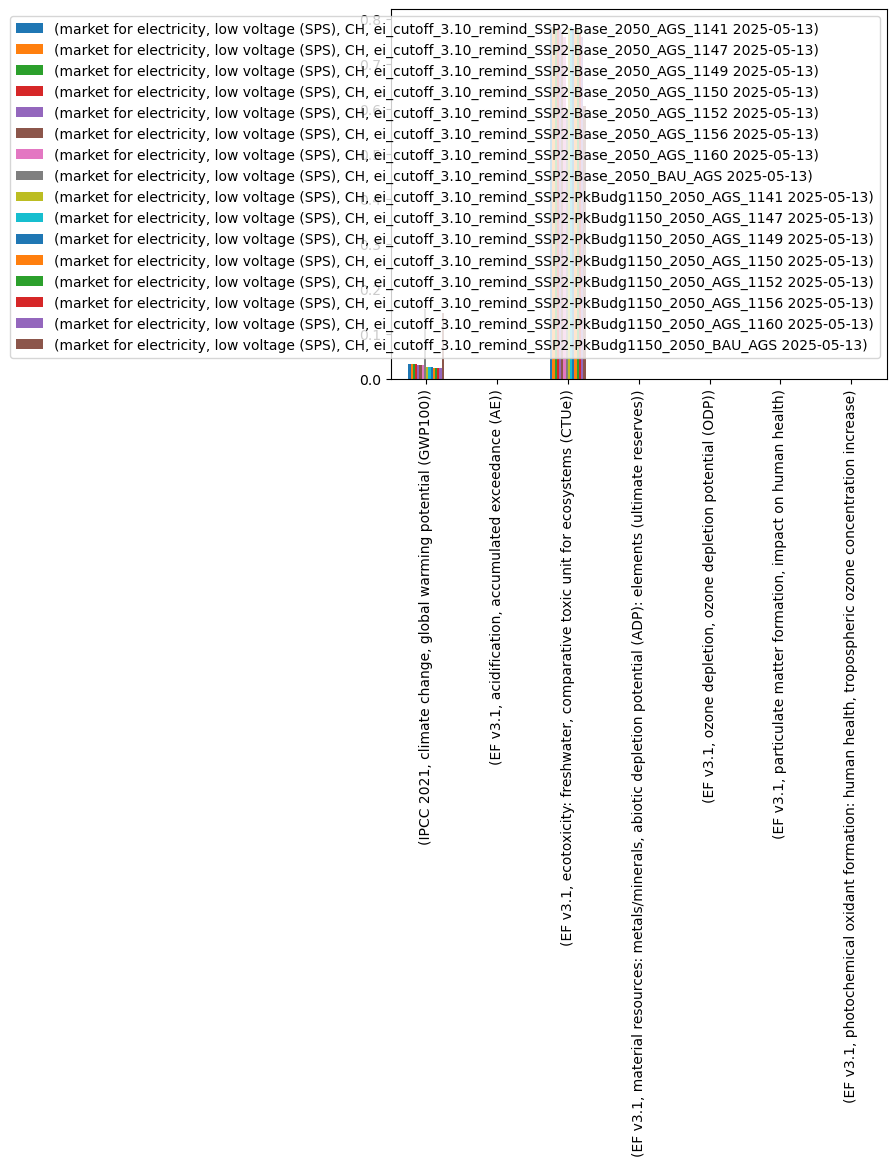

In [23]:
mLCAdf.plot.bar()

C:\Users\treyer_k\AppData\Local\Temp\ipykernel_27556\842778674.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.pyplot.tight_layout()


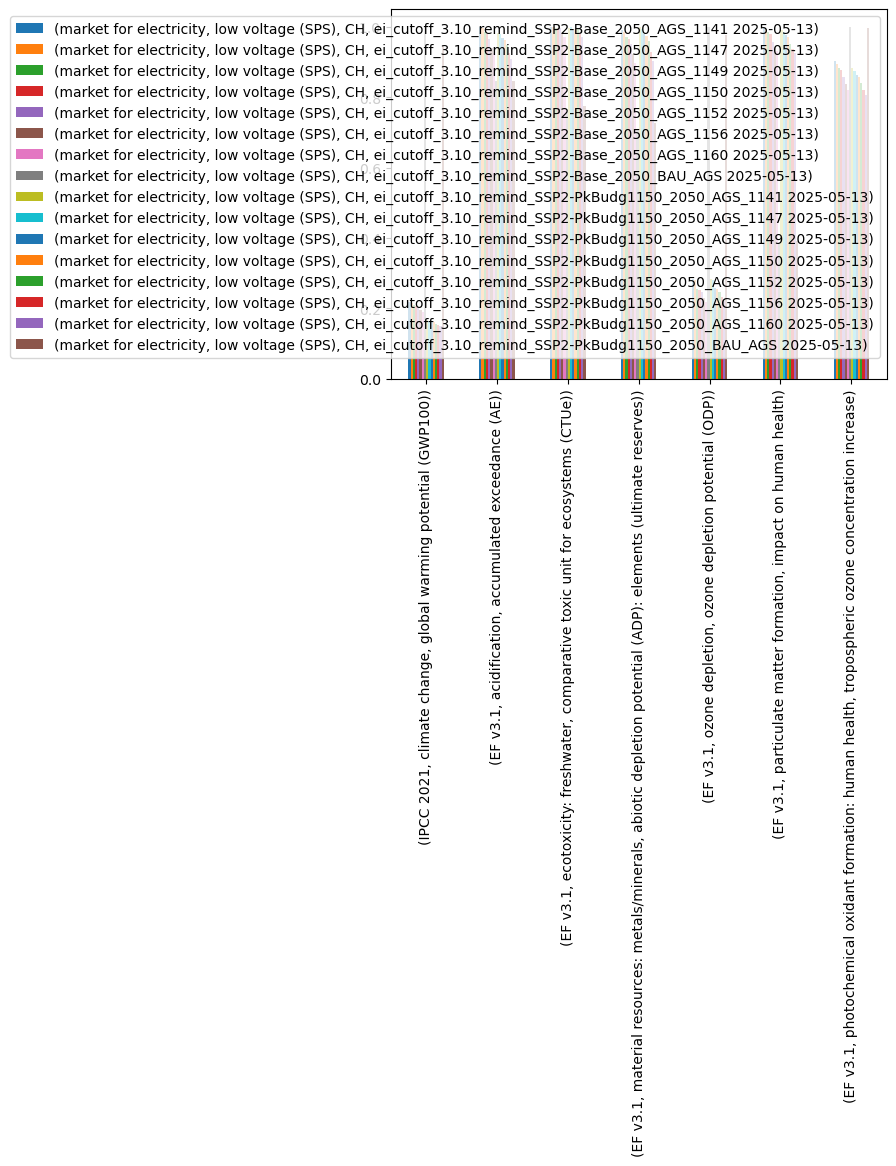

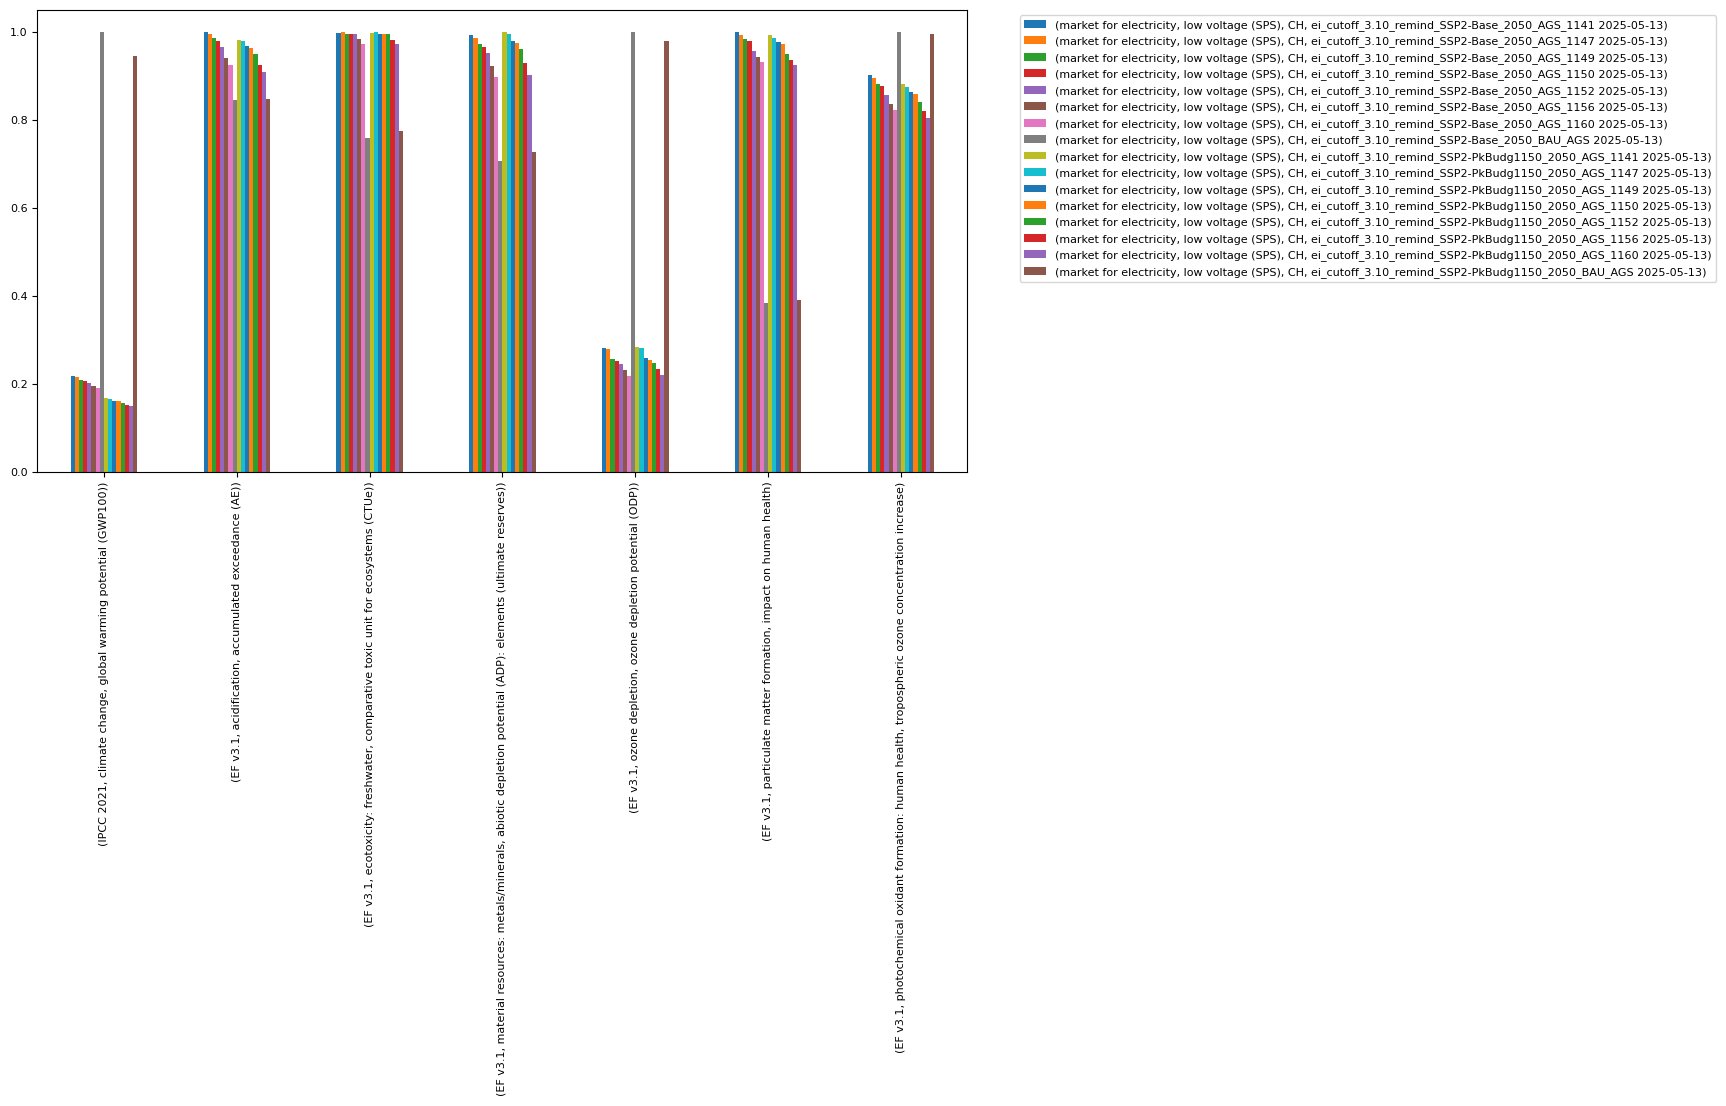

In [24]:
norm_df = (mLCAdf.T/mLCAdf.abs().max(axis=1)).T
norm_df.plot.bar()

#place the legend outside the plot
ax = norm_df.plot.bar(figsize=(12, 6), fontsize=8)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.pyplot.tight_layout()
plt.pyplot.savefig('ch_electricity_norm.png', dpi=300, bbox_inches='tight')

Doing the contribution analysis for the high voltage electricity mixes

In [25]:
#for each of the element in el_ds_dict, do the lca

FU = [{x:1} for x in el_ds_high]

bd.calculation_setups['Swiss electricity_contrib'] = {'inv':FU, 'ia': MY_METHODS_SHORT}
mLCA = bc.MultiLCA('Swiss electricity_contrib')
mLCA.results

array([[2.57931520e-02, 2.58347556e-04, 2.92759264e-01, 2.08867226e-06,
        1.92887693e-09, 4.90994408e-09, 1.76405542e-04],
       [2.54375225e-02, 2.56234163e-04, 2.94140365e-01, 2.05880257e-06,
        1.90217383e-09, 4.87092012e-09, 1.74522402e-04],
       [2.47357388e-02, 2.50898888e-04, 2.90960724e-01, 1.97716513e-06,
        1.70489412e-09, 4.82290184e-09, 1.71517214e-04],
       [2.44206196e-02, 2.48184320e-04, 2.90848206e-01, 1.94611229e-06,
        1.66999473e-09, 4.78926315e-09, 1.70075360e-04],
       [2.37846126e-02, 2.40864812e-04, 2.91083903e-01, 1.87374065e-06,
        1.61522181e-09, 4.67090509e-09, 1.65277377e-04],
       [2.27396705e-02, 2.29005944e-04, 2.81795682e-01, 1.70940198e-06,
        1.48368608e-09, 4.58849959e-09, 1.60014365e-04],
       [2.20691661e-02, 2.20722193e-04, 2.74189686e-01, 1.56935387e-06,
        1.36994373e-09, 4.52272342e-09, 1.56237113e-04],
       [1.37260236e-01, 1.81849821e-04, 1.20706428e-01, 5.40323028e-07,
        8.05465791e-09, 1

In [26]:
mLCAdf = pd.DataFrame(index = MY_METHODS_SHORT, 
                      columns = [(x['name'], x['location'], x['database'])
                                 for y in FU for x in y], data = mLCA.results.T)

mLCAdf

,"(market for electricity, high voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1141 2025-05-13)","(market for electricity, high voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1147 2025-05-13)","(market for electricity, high voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1149 2025-05-13)","(market for electricity, high voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1150 2025-05-13)","(market for electricity, high voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1152 2025-05-13)","(market for electricity, high voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1156 2025-05-13)","(market for electricity, high voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1160 2025-05-13)","(market for electricity, high voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-Base_2050_BAU_AGS 2025-05-13)","(market for electricity, high voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1141 2025-05-13)","(market for electricity, high voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1147 2025-05-13)","(market for electricity, high voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1149 2025-05-13)","(market for electricity, high voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1150 2025-05-13)","(market for electricity, high voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1152 2025-05-13)","(market for electricity, high voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1156 2025-05-13)","(market for electricity, high voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_AGS_1160 2025-05-13)","(market for electricity, high voltage (SPS), CH, ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050_BAU_AGS 2025-05-13)"
"(IPCC 2021, climate change, global warming potential (GWP100))",2.579315e-02,2.543752e-02,2.473574e-02,2.442062e-02,2.378461e-02,2.273967e-02,2.206917e-02,1.372602e-01,1.976664e-02,1.949234e-02,1.897992e-02,1.874389e-02,1.831393e-02,1.762774e-02,1.718217e-02,1.304255e-01
"(EF v3.1, acidification, accumulated exceedance (AE))",2.583476e-04,2.562342e-04,2.508989e-04,2.481843e-04,2.408648e-04,2.290059e-04,2.207222e-04,1.818498e-04,2.509873e-04,2.491387e-04,2.439588e-04,2.413352e-04,2.342747e-04,2.226628e-04,2.147511e-04,1.838126e-04
"(EF v3.1, ecotoxicity: freshwater, comparative toxic unit for ecosystems (CTUe))",2.927593e-01,2.941404e-01,2.909607e-01,2.908482e-01,2.910839e-01,2.817957e-01,2.741897e-01,1.207064e-01,2.925265e-01,2.940198e-01,2.907454e-01,2.905887e-01,2.907599e-01,2.813060e-01,2.738454e-01,1.329305e-01
"(EF v3.1, material resources: metals/minerals, abiotic depletion potential (ADP): elements (ultimate reserves))",2.088672e-06,2.058803e-06,1.977165e-06,1.946112e-06,1.873741e-06,1.709402e-06,1.569354e-06,5.403230e-07,2.127466e-06,2.097936e-06,2.014349e-06,1.982825e-06,1.909241e-06,1.741162e-06,1.599704e-06,6.373273e-07
"(EF v3.1, ozone depletion, ozone depletion potential (ODP))",1.928877e-09,1.902174e-09,1.704894e-09,1.669995e-09,1.615222e-09,1.483686e-09,1.369944e-09,8.054658e-09,1.934949e-09,1.906567e-09,1.713277e-09,1.678748e-09,1.624262e-09,1.500494e-09,1.388531e-09,7.860609e-09
"(EF v3.1, particulate matter formation, impact on human health)",4.909944e-09,4.870920e-09,4.822902e-09,4.789263e-09,4.670905e-09,4.588500e-09,4.522723e-09,1.491395e-09,4.866379e-09,4.829861e-09,4.784607e-09,4.751963e-09,4.635777e-09,4.557844e-09,4.497288e-09,1.528153e-09
"(EF v3.1, photochemical oxidant formation: human health, tropospheric ozone concentration increase)",1.764055e-04,1.745224e-04,1.715172e-04,1.700754e-04,1.652774e-04,1.600144e-04,1.562371e-04,2.008720e-04,1.724056e-04,1.706730e-04,1.677780e-04,1.663984e-04,1.617527e-04,1.566844e-04,1.531390e-04,2.006143e-04


In [27]:
#write this dataframe to excel with the name 'ch_electricity'
mLCAdf.to_excel('ch_electricity_ags_high.xlsx')

In [28]:
from polyviz.utils import calculate_supply_chain

In [29]:
a = el_ds_high[1]
print(a['name'])
print(a['database'])

market for electricity, high voltage (SPS)
ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1147 2025-05-13


In [30]:
el_short = el_ds_high[:2]

In [31]:
df = pd.DataFrame()

for act in el_ds_high:
    for m in MY_METHODS_SHORT:
        print(act, m, act['database'])
        data = calculate_supply_chain(act, m, 2, 1e-4)[0]
        data = [[act['database'], act['name'], act['location'], '-'.join(m)] + d for d in data]
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index = True)

df.columns = ['database', 'activity', 'location', 'lcia_method', 'level', 'contribution share', 'absolute score', 'amount in dataset', 
                      'activity contributing', 'location contributing', 'unit']
df.to_excel('contribution_analysis_ch_electricity.xlsx')

'market for electricity, high voltage (SPS)' (kilowatt hour, CH, None) ('IPCC 2021', 'climate change', 'global warming potential (GWP100)') ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1141 2025-05-13
Calculating supply chain score...
'market for electricity, high voltage (SPS)' (kilowatt hour, CH, None) ('EF v3.1', 'acidification', 'accumulated exceedance (AE)') ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1141 2025-05-13
Calculating supply chain score...
'market for electricity, high voltage (SPS)' (kilowatt hour, CH, None) ('EF v3.1', 'ecotoxicity: freshwater', 'comparative toxic unit for ecosystems (CTUe)') ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1141 2025-05-13
Calculating supply chain score...
'market for electricity, high voltage (SPS)' (kilowatt hour, CH, None) ('EF v3.1', 'material resources: metals/minerals', 'abiotic depletion potential (ADP): elements (ultimate reserves)') ei_cutoff_3.10_remind_SSP2-Base_2050_AGS_1141 2025-05-13
Calculating supply chain score...
'market for electr

# Import own inventories

 - CO2 supply chain: CO2 capture at KVA Linth, CO2 storage, transport, compression
 - Well drilling, surface plant, well closure

#### Import CO2 supply chain inventory

In [ ]:
#del bd.databases['ags']
#del bd.databases['co2_kva']

In [ ]:
imp = bi.ExcelImporter(r'C:\Users\treyer_k\Documents\PSI\AEGIS-CH\Publication\SP1_SP2_SP4\LCI\lci_co2_supply_chain.xlsx')
imp.apply_strategies()
imp.match_database("ecoinvent-3.10.1-cutoff", fields=('name','unit','location', 'reference product'))
imp.match_database(fields=('name', 'unit', 'location'))
imp.statistics()
#imp.write_excel(only_unlinked=True)
imp.write_excel()
list(imp.unlinked)

imp.write_database()

#### Import advanced geothermal plant inventory

In [ ]:
ags_dbs = [x for x in bd.databases if 'ags' in x]
ags_dbs

for db in ags_dbs:
    del bd.databases[db]

In [ ]:
imp = bi.ExcelImporter(r'C:\Users\treyer_k\Documents\PSI\AEGIS-CH\Publication\SP1_SP2_SP4\LCI\lci_ags.xlsx') #give the path to your inventory excel file
imp.apply_strategies()
imp.match_database("ecoinvent-3.10.1-cutoff", fields=('name','unit','location', 'reference product'))
imp.match_database("co2_kva", fields=('name','unit','location', 'reference product'))
imp.match_database(fields=('name', 'unit', 'location'))
imp.statistics()
#imp.write_excel(only_unlinked=True)
imp.write_excel()
list(imp.unlinked)

imp.write_database()

#### Doing a small LCA for check

In [ ]:
co2 = bd.Database('co2_kva')
len(co2)

In [ ]:
co2_final = [a for a in co2 if 'pumping' in a['name'] and '90' not in a['name'] and 'without' not in a['name']]
co2_final

In [ ]:
lca = bc.LCA({co2_final[0]:1})
FU = [{x:1} for x in co2_final]

bd.calculation_setups['co2_chain'] = {'inv': FU, 'ia': MY_METHODS_SHORT}

lca = bc.MultiLCA('co2_chain')
lca.results

In [ ]:
lcadf = pd.DataFrame(index = MY_METHODS_SHORT, 
                     columns = [(x['name'], x['location']) for y in FU for x in y], data = lca.results.T)
lcadf

In [ ]:
bd.Method(ipcc[0]).metadata['unit']

In [ ]:
lca = bc.LCA({co2_final[0]:1}, ipcc[0])
lca.lci()
lca.lcia()
lca.score

Do the contribution analysis for these co2 datasets

In [ ]:
from polyviz.utils import calculate_supply_chain

In [ ]:
df = pd.DataFrame()

for act in co2_final:
    for m in MY_METHODS_SHORT:
        print(act, m)
        data = calculate_supply_chain(act, m, 4, 1e-4)[0]
        data = [[act['name'], act['location'], '-'.join(m)] + d for d in data]
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index = True)
df.columns = ['activity', 'location', 'lcia_method', 'level', 'contribution share', 'absolute score', 'amount in dataset', 
                      'activity contributing', 'location contributing', 'unit']
df.to_excel('contribution_analysis_co2.xlsx')
        

Do the contribution analysis for the AGS datasets

In [ ]:
ags = bd.Database('ags')

In [ ]:
ags_electricity = [a for a in ags if 'electricity production' in a['name'] ]
ags_electricity

Link both databases to future databases so that the technology supply chains are valid for the future

Only pick 2050 LOW/BAU for both databases = 4 future versions in total

In [ ]:
df = pd.DataFrame()

for act in ags_electricity:
    for m in MY_METHODS_SHORT:
        print(act, m)
        data = calculate_supply_chain(act, m, 4, 1e-4)[0]
        data = [[act['name'], act['location'], '-'.join(m)] + d for d in data]
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index = True)
df.columns = ['activity', 'location', 'lcia_method', 'level', 'contribution share', 'absolute score', 'amount in dataset', 
                      'activity contributing', 'location contributing', 'unit']
df.to_excel('contribution_analysis_ags.xlsx')

# Comparison to other electricity producing technologies    

# Prepare mapping for contribution analysis

In [ ]:
activities = [a for a in co2 if 'without' not in a['name']
                    and 'water' not in a['name']
                    and 'AMP' not in a['name']
                    and'operation' not in a['name']
]
activities

In [ ]:
CONTRIBUTION_MAPPING_CO2 = {
'CO2 pumping, supercritical, into geothermal well, per meter': 'CO2 Pumping',
'CO2 production, supercritical, 90 bar, for pumping into geothermal well': 'CO2 Conditioning',
'CO2 transport, liquid, 15 bar, from waste incineration plant, Linth, Switzerland': 'CO2 Transport',
'CO2 storage, temporary, 5 days, 15 bar, waste incineration plant, Linth, Switzerland': 'CO2 Storage',
'CO2 conditioning, at 15 bar, waste incineration plant, Linth, Switzerland': 'CO2 Conditioning',
'CO2 captured at capture unit, waste incineration plant, Linth, Switzerland': 'CO2 Capture'}

In [ ]:
print(CONTRIBUTION_MAPPING_CO2.keys())

In [ ]:
def group_exchange_scores(lst):
    # We will store results in a dict, with keys for group label and values of LCIA score.
    grouped_results = defaultdict(int)

    for exc, score in lst[1:]:
        grouped_results[CONTRIBUTION_MAPPING_CO2[exc.input['name']]] += score
    return grouped_results

In [ ]:
import brightway2 as bw
import pyprind
from collections import defaultdict

In [ ]:
# This part of the script is adopted from Antonini and Treyer et al. (2020)
result_array = [[[] for _ in activities] for _ in MY_METHODS]  #Creating a list of lists where the outer iterates over methods and the inner over activities. 
#For each combination, it initializes an empty list

#Initialise the LCA object with the first and last activitiy in the list, so that we cover a good range of the activities list
#and can later on use lca.switch and lca.redo
lca = bw.LCA({activities[0]: 1, activities[-1]: 1}, method=MY_METHODS[0])
lca.lci()
lca.lcia()

for i, method in enumerate(pyprind.prog_bar(MY_METHODS)): #outer loop iterates over methods
    #print(method)
    lca.switch_method(method)
    for j, activity in enumerate(activities): #inner loop iterates over activities
        #print(activity['name'])
        lca.redo_lcia({activity: 1})  #calculates the LCA for the given activity
        # Add total to check afterwards that all exchanges add up to total
        result_array[i][j].append(("total", lca.score))
        for exc in activity.exchanges():
            if exc['type'] == 'technosphere':
                lca.redo_lcia({exc.input: exc['amount']})
                result_array[i][j].append((exc, lca.score))
            elif exc['type'] == 'biosphere':
                # Need to multiple the amount times its CF
                cf = lca.characterization_matrix[lca.biosphere_dict[exc.input], :].sum()
                result_array[i][j].append((exc, cf * exc['amount']))

#Checking for if the total score matches the sum of individual exchange scores for each activitiy
for method in result_array:
    for activity in method:
        if not np.allclose(activity[0][1], sum([o[1] for o in activity[1:]])):
            print("Mismatch")
            break

grouped_array = [[group_exchange_scores(j) for j in i] for i in result_array]

In [ ]:
#TODO: Show the results for the CO2 supply chain using the contribution mapping set up above

## Calculate LCIA scores using dataframes

I want to read in dataframes and multiply them with each other.

df_lcia_seed:
rows are activities (act1, act2, act3...)
columns are lcia categories (gwp, odp, adp, pm,...)
values are lcia scores (numerical)

df_lci:
rows are process names (p1, p2, p3,...)
columns are cases (c1, c2, c3)
values are numerical values (5, 4.4, 3, ...)

A vector is linked to each row which contains the activity name (act54, act3, act9) with which the values in df_lci need to be multiplied (the value which belongs to each activity is taken fro df_lcia_seed).

df_lcia:
rows are in hierarchy: first the impact category (gwp, odp, adp, pm,...), second the process names (p1, p2, p3) for each impact category
columns are the cases
values are the values from df_lci times the value from df_lcia_seed for the correct impact category and act combination (impact category is taken from first hierachy, act is taken from vector. 

A) LCIA dataframes for each IMAGE/STEM time step and scenario

In [ ]:

#TODO: create the dfs with the lcia seed for each time step and scenario
#import df from excel file, specific worksheet
df_lcia_seed = pd.read_excel(r'C:\Users\treyer_k\Documents\PSI\AEGIS-CH\Publication\SP1_SP2_SP4\lcia calculation.xlsx', sheet_name='df_lcia_seed')
df_lcia_seed

B) LCI input dataframe for all different cases

In [ ]:
#TODO: import the lci df which contains the data for different cases

df_lci = pd.read_excel(r'C:\Users\treyer_k\Documents\PSI\AEGIS-CH\Publication\SP1_SP2_SP4\lcia calculation.xlsx', sheet_name='df_lci')
df_lci

LCIA calculation

I think I can only do this for 1 scenario 1 year each time. 

In [ ]:
for category in df_lcia_seed.columns:
    #get impact factors for each process using the mapping vector
    impact_factor = vector.map(df_lcia_seed[category])

    #multiply the impact factor with the lci data
    df_lcia_category = df_lci.mul(impact_factors, axis = 0)

    #Create MultiIndex for output
    df_lcia_category.index = pd.MultiIndex.from_product([[category], df_lci.index])

    #Append to result dataframe
    df_lcia = pd.concat([df_lcia, df_lcia_category], axis=0)

#print result
print(df_lcia)

****************************************************************************************************************

In [ ]:
CONTRIBUTION_MAPPING_SYSTEM = {
    # Electrolyzer
    'electrolyzer production, 1MWe, PEM, Stack':"PEM construction", 
    'electrolyzer production, 1MWe, PEM, Balance of Plant':"PEM construction", 
    
    # Electricity
    "electricity production, hydro, reservoir, alpine region":"Electricity", 
    "electricity production, hydro, reservoir, non–alpine region":"Electricity", 
    "electricity production, hydro, reservoir, tropical region":"Electricity", 
    "market group for electricity, medium voltage":"Electricity",   
    'market for electricity, low voltage':"Electricity",    
    "electricity production, photovoltaic, 3kWp slanted–roof installation, multi–Si, panel, mounted": "Electricity", 
    "570 kWp open ground installation, multi–Si, on open ground": "Electricity", 
    
    "market for photovoltaic slanted–roof installation, 3kWp, multi–Si, panel, mounted, on roof": "Electricity", 
    "electricity production, wind, 1–3MW turbine, onshore":"Electricity", 
    "electricity production, natural gas, combined cycle power plant":"Electricity", 
    "market group for electricity, high voltage": "Electricity",
    'market group for electricity, low voltage': "Electricity",
    'electricity production, hydro, run–of–river':"Electricity", 
    'electricity production, wind, 1–3MW turbine, offshore':"Electricity", 
    'electricity production, nuclear, pressure water reactor':"Electricity", 
     "market group for electricity, high voltage": "Electricity",
    "market for electricity, medium voltage":"Electricity",  


#### In case several databases need to be deleted

Method 1)


In [ ]:
future_dbs = [x for x in bd.databases if 'remind' in x]
future_dbs

In [ ]:
for a in future_dbs:
    del bd.databases[a]

Method 2)

In [ ]:
bd.databases

In [ ]:
#in case created databases need to be deleted:
dbs = list(bd.databases)
for idx, col in enumerate(dbs):
    print(idx, col)

In [ ]:
#new list only containing the list items from index 11 onwards
dbs_del = list(bd.databases)[11:]
dbs_del

In [ ]:
#If you need to delete a chosen set of databases:
# create a new list with selected items based on indices
dbs_del = [dbs[i] for i in [2,3, 5, 9, 10, 11, 12, 13, 14]]
dbs_del

In [ ]:
#and delete those
for el in dbs_del:
    del bd.databases[el]

In [ ]:
dbs = list(bd.databases)
for idx, col in enumerate(dbs):
    print(idx, col)

In [ ]:
#re-order that list
order = [0,1,4,9,10,7,8,3,5,6,2]
dbs = [dbs[i] for i in order]
dbs

### Couple foreground databases with future background databases

In [ ]:
# relink foreground database to new background database

old_db_name = "co2_kva"

# current background database
old_dependency_name = "ecoinvent-3.10.1-cutoff"

# new background database to link to
new_dependency_name = "ei_cutoff_3.10_image_SSP2-Base_2030_AGS_1160 2025-02-14"

# new foreground database name
new_db_name = f"{old_db_name} {new_dependency_name}"


In [ ]:
# load database object
db = bw2data.Database(old_db_name)

In [ ]:
# turn it into a dictionary
data = db.load()

for i, ds in data.items():

    ds["database"] = new_db_name
    for e in ds["exchanges"]:
        #print(e)
        if e.get("input")[0] == old_dependency_name:
            e["input"] = (new_dependency_name, e["input"][1])
        
        e["output"] = (new_db_name, e["output"][1])

        if e["type"] == "production":
            e["output"] = e["input"]
data = {(new_db_name, k[1]): v for k, v in data.items()}

# write it back to project
bw2data.Database(new_db_name).write(data)

Now do this in a loop for all background databases

In [ ]:
# relink foreground database to new background database

old_db_name = "co2_kva"

# current background database
old_dependency_name = "ecoinvent-3.10.1-cutoff"

In [ ]:
# new background database to link to
new_dependency_name_list = dbs[5:] 
new_dependency_name_list

new_dependency_name_list = [x for x in bd.databases if 'SSP2' in x]
new_dependency_name_list

In [ ]:
for new_dependency_name in new_dependency_name_list:
    # new foreground database name
    new_db_name = f"{old_db_name}_{new_dependency_name}"
    if new_db_name in bd.databases:
        del bd.databases['new_db_name']

    # load database object
    db = bd.Database(old_db_name)

    # turn it into a dictionary
    data = db.load()
        
    for i, ds in data.items():
        ds["database"] = new_db_name
        for e in ds["exchanges"]:
            #print(e)
            if e.get("input")[0] == old_dependency_name:
                e["input"] = (new_dependency_name, e["input"][1])
            e["output"] = (new_db_name, e["output"][1])
            if e["type"] == "production":
                e["output"] = e["input"]
    data = {(new_db_name, k[1]): v for k, v in data.items()}

    # write it back to project
    bd.Database(new_db_name).write(data)
    print(f"Created database {new_db_name}")

In [ ]:
list(bd.databases)

In [ ]:
old_db_name = 'lci_ags'

# current databases used
old_dependency_name_ecoinvent = "ecoinvent-3.10.1-cutoff"
old_dependency_name_co2 = "co2_kva"


In [ ]:
# new background databases to link to

new_dependency_name_ecoinvent = [x for x in bd.databases if 'SSP2' in x and 'co2' not in x]
new_dependency_name_co2 = [x for x in bd.databases if 'SSP2' in x and 'co2' in x]



In [ ]:
# new foreground database name
new_db_name = f"{old_db_name} {new_dependency_name}"

# load database object
db = bw2data.Database(old_db_name)

# turn it into a dictionary
data = db.load()

for i, ds in data.items():

    ds["database"] = new_db_name
    for e in ds["exchanges"]:
        #print(e)
        if e.get("input")[0] == old_dependency_name:
            e["input"] = (new_dependency_name, e["input"][1])
        
        e["output"] = (new_db_name, e["output"][1])

        if e["type"] == "production":
            e["output"] = e["input"]
data = {(new_db_name, k[1]): v for k, v in data.items()}

# write it back to project
bw2data.Database(new_db_name).write(data)

# General calculations: well designs and derived material/energy consumption, rotary drilling vs. PPGD time, lifetime electricity production

##### Plant variables

In [ ]:
#Plant capacity: 
#Provided by ETH SP2. Declining capacity over the years is considered in the model, this is a steady state result
plant_net_capacity_electrical = 1.89 #MWe
plant_net_capacity_thermal = 2.8 #MWth


#Plant lifetime:
plant_lifetime_economic = 30 #years
plant_lifetime_extended = 50 #years
plant_lifetime_long = 100 #years

#Plant capacity factor:
plant_capacity_factor = 0.9

#hours per year
hpa = 8760 #h/a

#Lifetime electricity production in kWh:
life_elprod_economic = (plant_net_capacity_electrical * 1000) * plant_capacity_factor * hpa * plant_lifetime_economic #kWh
life_elprod_extended = (plant_net_capacity_electrical * 1000) * plant_capacity_factor * hpa * plant_lifetime_extended
life_elprod_long = (plant_net_capacity_electrical * 1000) * plant_capacity_factor * hpa * plant_lifetime_long

print(life_elprod_economic, life_elprod_extended, life_elprod_long)




#### Drilling

In [ ]:
#well designs

km6 = {'S1': 250,
       'S2': 1750,
       'S3': 2000,
       'S4': 2000,
       'S_hor': 6*7000}

km6





# Introduce variability aspects

 - Well depth: 4.5 km, 6 km (default), 8 km => implications on well construction (energy use vertical, casing material use (steel, cement, water))

 - Rotary drilling => implications on well construction (energy use, vertical / horizontal)

# Introduce sensitivity aspects

 - Lifetime: 30a, 50a (default), 100a => changes the lifetime electricity output and requires replacement of surface plant components
 - Electricity origin: 
   - for drilling
   - for CO2 chain
   - hydro, run-of-river (minimum) // open ground PV // wind turbine // CH electricity mix

In [ ]:
CONTRIBUTION_MAPPING_ELECTRICITY = {

    # Electricity
    "electricity production, hydro, reservoir, alpine region":"Electricity", 
    "electricity production, hydro, reservoir, non–alpine region":"Electricity", 
    "electricity production, hydro, reservoir, tropical region":"Electricity", 
    "market group for electricity, medium voltage":"Electricity",   
    'market for electricity, low voltage':"Electricity",    
    "electricity production, photovoltaic, 3kWp slanted–roof installation, multi–Si, panel, mounted": "Electricity", 
    "570 kWp open ground installation, multi–Si, on open ground": "Electricity", 
    
    "market for photovoltaic slanted–roof installation, 3kWp, multi–Si, panel, mounted, on roof": "Electricity", 
    "electricity production, wind, 1–3MW turbine, onshore":"Electricity", 
    "electricity production, natural gas, combined cycle power plant":"Electricity", 
    "market group for electricity, high voltage": "Electricity",
    'market group for electricity, low voltage': "Electricity",
    'electricity production, hydro, run–of–river':"Electricity", 
    'electricity production, wind, 1–3MW turbine, offshore':"Electricity", 
    'electricity production, nuclear, pressure water reactor':"Electricity", 
     "market group for electricity, high voltage": "Electricity",
    "market for electricity, medium voltage":"Electricity",  
}

In [ ]:
def group_exchange_scores(lst):
    # We will store results in a dict, with keys for group label and values of LCIA score.
    grouped_results = defaultdict(int)

    for exc, score in lst[1:]:
        grouped_results[CONTRIBUTION_MAPPING_SYSTEM[exc.input['name']]] += score
    return grouped_results

In [ ]:
# This part of the script is adopted from Antonini and Treyer et al. (2020)
result_array = [[[] for _ in activities] for _ in MY_METHODS]

lca = bw.LCA({activities[0]: 1, activities[-1]: 1}, method=MY_METHODS[0])
lca.lci()
lca.lcia()

for i, method in enumerate(pyprind.prog_bar(MY_METHODS)):
    #print(method)
    lca.switch_method(method)
    for j, activity in enumerate(activities):
        #print(activity['name'])
        lca.redo_lcia({activity: 1})
        # Add total to check afterwards that all exchanges add up to total
        result_array[i][j].append(("total", lca.score))
        for exc in activity.exchanges():
            if exc['type'] == 'technosphere':
                lca.redo_lcia({exc.input: exc['amount']})
                result_array[i][j].append((exc, lca.score))
            elif exc['type'] == 'biosphere':
                # Need to multiple the amount times its CF
                cf = lca.characterization_matrix[lca.biosphere_dict[exc.input], :].sum()
                result_array[i][j].append((exc, cf * exc['amount']))

for method in result_array:
    for activity in method:
        if not np.allclose(activity[0][1], sum([o[1] for o in activity[1:]])):
            print("Mismatch")
            break

grouped_array = [[group_exchange_scores(j) for j in i] for i in result_array]

In [ ]:
df_total = pd.DataFrame({})
df_act = pd.DataFrame({})

for j, mt in enumerate(MY_METHODS):
    df_add_act = pd.DataFrame({})
    for i, act in enumerate(activities):
        data_0 = dict(grouped_array[j][i])
        df_add = pd.DataFrame.from_dict(data_0, orient='index')
        col_name = LIST_ACTIVITIES[i]
        df_add.rename(columns = {"climate change total":act['name']}, inplace = True)
        df_add.rename(columns = {0:act['name']}, inplace = True)
        df_add.index.names = ['contributor']

        df_add['category'] = str(MY_METHODS[j][1])  
        df_add['db_name'] = DB_NAME_INIT
        
        df_add = df_add.reset_index().set_index(['category','contributor', 'db_name'])
        df_add_act = pd.concat([df_add_act, df_add], axis=1)
    
    df_total = pd.concat([df_total, df_add_act], axis=0)
df_total

In [ ]:
df_total_2 = df_total.reindex(sorted(df_total.columns), 
                                axis=1)
df_total_2.columns = df_total_2.columns.str.replace("hydrogen production,"
                    ,"").str.replace("gaseous, 25 bar, from electrolysis,",
                                        "").str.replace(", global cf",
                                        "  (CF=").str.replace("]",
                                        ")").str.replace("[",
                                        "").str.replace(", 25 bar, wc",
                                        "").str.replace("of natural gas",
                                        "").str.replace("MDEA, 98% eff.", 
                                        "with CCS", regex=True).str.replace(", with CCS",
                                        "").str.replace("(",
                                        "\n (").str.replace("res.",
                                        "Residential").str.replace("off-",
                                        "off").str.replace("on-",
                                        "on")
df_total_2 = df_total_2.reindex(sorted(df_total_2.columns), 
                            axis=1)
df_total_2.columns = df_total_2.columns.str.title()
df_total_2.columns = df_total_2.columns.str.replace("Pv", "PV").str.replace("Ccs", "CCS").str.replace(", 25 Bar",
                                         "")
df_total_2

In [ ]:
colors = ['#a50026','#d73027','#f46d43','#fdae61','#fee090','#ffffbf','#e0f3f8','#abd9e9','#74add1','#4575b4','#313695', "white", 'black']

color_dict = {
             'CO$_{2}$ transport & storage':colors[0],
             'CO$_{2}$ emissions':colors[1],
             'Water supply':colors[2],
             'Cooling water':colors[3],
             'Electricity':colors[4],    
             'Fuel burning':colors[5],
             'Fuel supply chain':colors[6],
             'Oxygen':colors[7],
             'Plant infrastructure':colors[8],
    'Storage supply chain': colors[9],
    "Hydrogen leakage":colors[10],
    "PEM construction": colors[11],
    "Water (desalination)": colors[12],
             }

hex_dict = {
             'CO$_{2}$ transport & storage':"/",
             'CO$_{2}$ emissions':"",
             'Water supply':"",
             'Cooling water':"",
             'Electricity':"\\",  
             'Fuel burning':"/",
             'Fuel supply chain':"/",
             'Oxygen':"",
             'Plant infrastructure':"/",
    'Storage supply chain': "/",
    "Hydrogen leakage": "/",
    "PEM construction": "/",
    "Water (desalination)": '',
             }

# Contribution analyses of env impact categories

In [ ]:
rc = {
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '0.3',
      'font.family':'Arial',
      'font.size' : 80,
      'xtick.bottom': True,
     'xtick.top': True,
     'ytick.left': True,
     'ytick.right': True,
        'patch.facecolor': COLOR_CHOSEN,
        'patch.linewidth': 4,
      'patch.force_edgecolor': True,
    'axes.linewidth':10
     }

plt.rcParams.update(rc) 
plt.rcParams['axes.axisbelow'] = True
plt.rcParams["axes.edgecolor"] = "black"

font =108

list_unique_configs = [
                        "PEM – ground-mounted\nsolar PV", "PEM – rooftop\nsolar PV",
                       "PEM – offshore wind\n(desalination)", 
                       "PEM – onshore wind", 
                    "Autothermal\nreforming", "Steam\nmethane\nreforming",]

for cat in MY_METHODS:
    print(cat)
    df_select = df_total_2.loc[df_total.index.get_level_values('category') == cat[1], :]

    ax = df_select.T.plot(kind='bar', fontsize = font, figsize=(100, 40), width = 0.50,
                   stacked = True, zorder=9,color=[color_dict[r] for r in df_select.index.get_level_values(1)])
    ax.patch.set_facecolor("#F8F8F8")

    max_y= max(df_select.sum(axis=0))*1.25
    min_y= min(df_select.min(axis=0))*1.3

    ax.set_ylim(min_y,max_y)  

    bars = ax.patches
    patterns = [hex_dict[z] for z in df_select.index.get_level_values(1)]  # set hatch patterns in the correct order
    hatches = []  # list for hatches in the order of the bars

    for h in patterns:  # loop over patterns to create bar-ordered hatches
        for i in range(int(len(bars) / len(patterns))):
            hatches.append(h)

    for bar, hatch in zip(bars, hatches):  # loop over bars and hatches to set hatches in correct order
        bar.set_hatch(hatch)

    coordinates = [2.5, 5.5, 8.5,11.5, 13.5, 15.5]
    
    if "climate change" in str(cat):
        ax.legend( bbox_to_anchor=(0.97,-0.58),borderpad=0.5, labelspacing=0,
                              shadow=0, facecolor=COLOR_CHOSEN, fontsize=font-10, framealpha=1, ncol=4, frameon=False,  
                  labels= df_select.index.get_level_values(1))
    else:
        ax.legend( bbox_to_anchor=(0.97,1.20),borderpad=0.5, labelspacing=0,
                              shadow=0, facecolor=COLOR_CHOSEN, fontsize=font-10, framealpha=1, ncol=4, frameon=False,  
                  labels= df_select.index.get_level_values(1))

    for i, res in enumerate(list(df_select.sum())):
        if res>50:
            ax.text((i-0.15),res*1.02,int(res), fontsize=font-7, zorder=10, weight='bold', rotation = 0, color=COLOR_CHOSEN)
        elif res>10:
            ax.text((i-0.25),res*1.02,round(res,1), fontsize=font-7, zorder=10, weight='bold', rotation = 0, color=COLOR_CHOSEN)
        elif res>1:
            ax.text((i-0.20),res*1.02,round(res,1), fontsize=font-7, zorder=10, weight='bold', rotation = 0, color=COLOR_CHOSEN)
        elif res>0.001:
            ax.text((i-0.3),res*1.02,round(res,3), fontsize=font-7, zorder=10, weight='bold', rotation = 0, color=COLOR_CHOSEN)
        else:
            pass
    
    ax.xaxis.grid(False, which = 'both')
    ax.yaxis.grid(True, which = 'both', color=COLOR_CHOSEN)

    text = list_unique_configs
    correction_factor = 2.3
    ax.set_xlabel("", fontsize = font)    

    for count, l in enumerate(coordinates):
        if count != (len(coordinates)-1):
            ax.vlines(x=l, ymin=min_y, ymax=max_y, colors='black', lw=9, label='vline_single')
        point_earlier = count-1
        
        if count >3:
            text_point = 0.5+ (coordinates[point_earlier] + coordinates[count] - correction_factor - 0.1) / 2    
        elif count > 1:
            text_point = (coordinates[point_earlier] + coordinates[count] - correction_factor -0.2) / 2
        elif count == 1:
            text_point = (coordinates[point_earlier] + coordinates[count] - correction_factor) / 2
        elif count == 0:
            text_point = (0 + coordinates[count] - correction_factor) -0.5   
        else:
            text_point = (0 + coordinates[count] - correction_factor) -0.1
        ax.text(text_point+0.04,max_y*0.88,text[count], fontsize=font-30, zorder=10, weight='bold', color=COLOR_CHOSEN)

    ax.tick_params(axis='x', which='major', labelsize=font-3, pad =40, rotation=90)
    ax.tick_params(axis='y', which='minor', labelsize=font-3, rotation=0)
        
    if "Water consumption" in str(cat):
        ax.set_ylabel("Impacts on {} [{}/kg H$_2$]".format(cat[3].replace(": "," "),DICT_UNITS[cat]), size= font-2, color=COLOR_CHOSEN)
    elif "climate change" in str(cat):
        ax.set_ylabel("Impacts on {} [{}/kg H$_2$]".format(cat[1].replace(": "," "),DICT_UNITS[cat]), size= font-2, color=COLOR_CHOSEN) 
        ax.axhline(y=4.4, xmin=0, xmax=25, label='Green hydrogen', color='green', lw=5)
    else:
        ax.set_ylabel("Impacts on {} [{}/kg H$_2$]".format(cat[1].replace(": "," "),DICT_UNITS[cat]), size= font-2, color=COLOR_CHOSEN)
        
    ##################################################################
    ax3= ax.twinx()

    ax3.set_ylim(min_y/MJ_KG_H2, max_y/MJ_KG_H2)
        
    if "Water consumption" in str(cat):
        ax3.set_ylabel("[{}/MJ H$_2$]".format(DICT_UNITS[cat]), size= font-2, color=COLOR_CHOSEN)
    elif "climate change" in str(cat):
        ax3.set_ylabel("[{}/MJ H$_2$]".format(DICT_UNITS[cat]), size= font-2, color=COLOR_CHOSEN) 
        ax3.axhline(y=4.4, xmin=0, xmax=25, label='Green hydrogen', color='darkgreen', lw=5)
    else:
        ax3.set_ylabel("[{}/MJ H$_2$]".format(DICT_UNITS[cat]), size= font-2, color=COLOR_CHOSEN)
    ax3.grid(None)
    ax3.grid(False)
    ax3.tick_params(axis='x', which='major', labelsize=font-3, pad =40, rotation=90)
    ax3.tick_params(axis='y', which='minor', labelsize=font-3, rotation=0)
    ax3.yaxis.set_tick_params(labelsize=font-3)
    ##################################################################
        
    ax.set_xlabel("", fontsize = font, labelpad=50)  
    
    ax.axhline(y=0, xmin=0, xmax=25, lw=3, linestyle = "--", color=COLOR_CHOSEN)

    name = "{}".format(cat[1].replace("/","_").replace(":",""))
    
    ax.tick_params(axis='x', colors = COLOR_CHOSEN)
    ax.tick_params(axis='y', colors = COLOR_CHOSEN)
    
    plt.rc('axes',edgecolor=COLOR_CHOSEN)
    
    to_disk = "figs/{}.png".format(cat[1].replace("/","_").replace(": ","_").replace(" ","_").replace(",",""))
    plt.savefig(to_disk, dpi = 50, bbox_inches = 'tight')

# Spider graphs

In [ ]:
total_df_spider = df_total_2.groupby(level=[0]).sum()
total_df_spider

In [ ]:
total_df_spider = pd.concat([ total_df_spider.iloc[:, 1:2], total_df_spider.iloc[:, 4:5],
            total_df_spider.iloc[:, 7:8], total_df_spider.iloc[:, 10:11],
            total_df_spider.iloc[:, 12:]
          ], axis=1)
total_df_spider

In [ ]:
# Transpose the DataFrame
total_df_spider = total_df_spider.T

# Rename columns using a dictionary
column_renames = {
    'Land transformation': "LD", 
    'acidification': "AC",  
    'climate change': "CC", 
    'ecotoxicity: freshwater': "ET$_{F}$",  
    'ecotoxicity: freshwater, inorganics': "ET$_{FI}$",
    'ecotoxicity: freshwater, organics': "ET$_{FO}$",
    'energy resources: non-renewable': "ER",
    'eutrophication: freshwater': "EF$_{F}$",
    'eutrophication: marine': "EF$_{M}$",
    'eutrophication: terrestrial': "EF$_{T}$", 
    'human toxicity: carcinogenic': "HT$_{C}$", 
    'human toxicity: carcinogenic, inorganics': "HT$_{CI}$", 
    'human toxicity: carcinogenic, organics': "HT$_{CO}$", 
    'human toxicity: non-carcinogenic': "HT$_{NC}$", 
    'human toxicity: non-carcinogenic, inorganics': "HT$_{NCI}$", 
    'human toxicity: non-carcinogenic, organics': "HT$_{NCO}$", 
    'ionising radiation: human health': "IR", 
    'material resources: metals/minerals': "MM",
    'ozone depletion': "OD",
    'particulate matter formation': "PM",
    'photochemical oxidant formation: human health': "PF",
    'water use':"WU",
    'land use': "LU",
    "1.1 (20180117)":"WC"
}

total_df_spider.rename(columns=column_renames, inplace=True)

# Remove " consumption" from column names
total_df_spider.columns = total_df_spider.columns.str.replace(" consumption", "")

# Transpose back the DataFrame
total_df_spider = total_df_spider.T
max_categories = np.array(total_df_spider.max(axis=1))
total_df_spider_select = total_df_spider
total_df_spider_select['maximum'] = max_categories
total_df_spider_select[total_df_spider_select<0] = 0
total_df_spider_select

In [ ]:
df_normalized = total_df_spider_select.loc[:,].div(total_df_spider_select["maximum"], axis=0)
total_df_spider_select = df_normalized.drop(columns=['maximum'])
df_values = total_df_spider_select.T.to_numpy()
df_values

In [ ]:
rc = {
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      'font.family':'Arial',
      'font.size' : 90,
      'xtick.bottom': True,
     'xtick.top': True,
     'ytick.left': True,
     'ytick.right': True,
        'patch.facecolor': COLOR_CHOSEN,
        'patch.linewidth': 10,
      'patch.force_edgecolor': True,
    'axes.linewidth':20
     }

plt.rcParams.update(rc) 
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['grid.color'] = '0.3'

# Collect data
array_info = df_values

labels_2 = list(total_df_spider_select.T.columns)
names = list(total_df_spider_select.columns)
names = [n.replace("Steam Methane Reforming", "SMR").replace("Auto-Thermal Reforming", "ATR").replace("= ", "=").replace("25 Bar","").replace(",","")  for n in names]
list_configs = labels_2

data = [labels_2,
        ('', array_info)
        ]

colors = ["darkgreen","darkgreen","darkgreen","darkgreen",
          "#5d5d5d", "darkblue", "#5d5d5d", "darkblue",] 

type_radar = "polygon"

N = len(data[0])
theta = radar_factory(N, frame='polygon')
tickss = ['0', '0.2', '0.4', '0.6', "0.8", '1']
fig, axs = plt.subplots(2,4, figsize=(200*0.92,114*0.92), subplot_kw=dict(projection='radar'))
general_font = 165

# Results per config
for i, cf in enumerate(names):
    # Calculate the value of j based on the index
    j = i // 4
    
    # Calculate the value of k based on the index and j
    k = i - (4 * j)

    data = [labels_2,
        (names, [array_info[i]])
        ]
    N = len(data[0])
    theta = radar_factory(N, frame='polygon')
    
    spoke_labels = data.pop(0)
    title, case_data = data[0]

    title = list_configs[i]#r"$\bf{" + list_configs[i] + "}$" + "\n \n" + "Reference configuration: {}".format(names[i]) + ""
    axs[j, k].text(0.81, 1.59, "{}. {}".format(chr(ord('`')+i+1),names[i]), fontsize=general_font-3, weight = 'bold', color = COLOR_CHOSEN)
    axs[j, k].set_ylim(bottom=0)
    
    for d in case_data:
        line = axs[j, k].plot(theta, d, linewidth = 8, color = colors[i])
        axs[j, k].fill(theta, d,  alpha=0.3, color = colors[i]) #colors[i])

    axs[j, k].set_varlabels("")
    axs[j, k].set_rgrids([0, 0.2, 0.4, 0.6, 0.8, 1], alpha=0.8, angle=15, labels=tickss, fontsize=general_font-5, color = COLOR_CHOSEN)
    axs[j, k].grid(linewidth=2)
 
    axs[j, k].set_frame_on(True)
    pi = np.pi
    for b in range(N):
        angle_rad = b / float(N) * 2 * pi

        if angle_rad == 0:
            ha, distance_ax = "center", 1.05
        elif 0 < angle_rad < pi:
            ha, distance_ax = "left", 1.18
        elif angle_rad == pi:
            ha, distance_ax = "center", 1.05
        else:
            ha, distance_ax = "right", 1.22
        axs[j, k].text(angle_rad, distance_ax, labels_2[b], size=general_font-15, horizontalalignment=ha, 
                       verticalalignment="center", color = COLOR_CHOSEN)   
plt.rc('xtick', labelsize=general_font, color = COLOR_CHOSEN) 
plt.rc('ytick', labelsize=general_font, color = COLOR_CHOSEN) 
fig.subplots_adjust(#top=0.27, bottom=0.15, 
                    wspace = 1.9, hspace=1.9 )
plt.tight_layout()
plt.savefig("figs/results_trade_offs_h2.png", dpi = 60, bbox_inches = 'tight')

# Climate impacts for other future scenarios

In [ ]:
rc = {
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      'font.family':'Arial',
      'font.size' : 90,
      'xtick.bottom': True,
     'xtick.top': True,
     'ytick.left': True,
     'ytick.right': True,
        'patch.facecolor': COLOR_CHOSEN,
        'patch.linewidth': 10,
      'patch.force_edgecolor': True,
    'axes.linewidth':20
     }

plt.rcParams.update(rc) 
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['grid.color'] = '0.3'

# Collect data
array_info = df_values

labels_2 = list(total_df_spider_select.T.columns)
names = list(total_df_spider_select.columns)
names = [n.replace("Steam Methane Reforming", "SMR").replace("Auto-Thermal Reforming", "ATR").replace("= ", "=").replace("25 Bar","").replace(",","")  for n in names]
list_configs = labels_2

data = [labels_2,
        ('', array_info)
        ]

colors = ["darkgreen","darkgreen","darkgreen","darkgreen",
          "#5d5d5d", "darkblue", "#5d5d5d", "darkblue",] 

type_radar = "polygon"

N = len(data[0])
theta = radar_factory(N, frame='polygon')
tickss = ['0', '0.2', '0.4', '0.6', "0.8", '1']
fig, axs = plt.subplots(2,4, figsize=(200*0.92,114*0.92), subplot_kw=dict(projection='radar'))
general_font = 165

# Results per config
for i, cf in enumerate(names):
    # Calculate the value of j based on the index
    j = i // 4
    
    # Calculate the value of k based on the index and j
    k = i - (4 * j)

    data = [labels_2,
        (names, [array_info[i]])
        ]
    N = len(data[0])
    theta = radar_factory(N, frame='polygon')
    
    spoke_labels = data.pop(0)
    title, case_data = data[0]

    title = list_configs[i]#r"$\bf{" + list_configs[i] + "}$" + "\n \n" + "Reference configuration: {}".format(names[i]) + ""
    axs[j, k].text(0.81, 1.59, "{}. {}".format(chr(ord('`')+i+1),names[i]), fontsize=general_font-3, weight = 'bold', color = COLOR_CHOSEN)
    axs[j, k].set_ylim(bottom=0)
    
    for d in case_data:
        line = axs[j, k].plot(theta, d, linewidth = 8, color = colors[i])
        axs[j, k].fill(theta, d,  alpha=0.3, color = colors[i]) #colors[i])

    axs[j, k].set_varlabels("")
    axs[j, k].set_rgrids([0, 0.2, 0.4, 0.6, 0.8, 1], alpha=0.8, angle=15, labels=tickss, fontsize=general_font-5, color = COLOR_CHOSEN)
    axs[j, k].grid(linewidth=2)
 
    axs[j, k].set_frame_on(True)
    pi = np.pi
    for b in range(N):
        angle_rad = b / float(N) * 2 * pi

        if angle_rad == 0:
            ha, distance_ax = "center", 1.05
        elif 0 < angle_rad < pi:
            ha, distance_ax = "left", 1.18
        elif angle_rad == pi:
            ha, distance_ax = "center", 1.05
        else:
            ha, distance_ax = "right", 1.22
        axs[j, k].text(angle_rad, distance_ax, labels_2[b], size=general_font-15, horizontalalignment=ha, 
                       verticalalignment="center", color = COLOR_CHOSEN)   
plt.rc('xtick', labelsize=general_font, color = COLOR_CHOSEN) 
plt.rc('ytick', labelsize=general_font, color = COLOR_CHOSEN) 
fig.subplots_adjust(#top=0.27, bottom=0.15, 
                    wspace = 1.9, hspace=1.9 )
plt.tight_layout()
plt.savefig("figs/results_trade_offs_h2.png", dpi = 60, bbox_inches = 'tight')